# Data Science for Construction, Architecture and Engineering
### Week 5 - Introduction to Machine Learning
## Exercise Set 5.1 - Introduction to ML - Clustering

This exercise is related to the first half of Week 5 videos. Using the same data (Project Building Data Genome) and packages (sklearn, matplotlib) as in the videos, the following tasks about supervised and unsupervised learning algorithms. 


There is an introduction video available to explain the process of using this exercise video.

The developers of this exercise are Ananya Joshi, a Fulbright Scholar to Singapore for 2019-2020 and Mahmoud Abdelrahman, a Ph.D. student at NUS and a teaching assistant of this course.



#### Setup the environment

Let's set up the environment that is similar to the colab notebooks from the videos and read the data first:

In [1]:
# Import packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib


In [2]:
# Import Machine learning modules
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime
import seaborn as sns

In [3]:
# Mount the drive
# from google.colab import drive
# drive.mount('/content/gdrive')
# Change directory location (hint: chdir)
# os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/Week 3 - Construction - Pandas Fundamentals/meter_data/")

## Exercise 05.1.1 - Visualize Daily Profiles for Building

In the first exercise, we will simply load data from a building in a similar way as what was done in the notebook from the videos focused on Clustering. In the following cells you will simply need to follow the instructions to create visualizations of the daily profiles of both *weekdays* and *weekends*.

In this Exercise, let's load the data from the building `Office_Mercedes.csv`
 "Office Mercedes" building. Follow the instructions in each code cell to undertake this process.

 Hint: these code are basically copy and paste from the notebook (`Clustering and Regression -  Daily Electrical Load Profiles and Prediction.ipynb`) from the vides with certain modifications.


In [6]:
# YOUR CODE HERE to load the data set from the file and new columns that add date and time. (approx. 2-4 lines of code)
df = pd.read_csv("Office_Mercedes.csv", index_col = "timestamp", parse_dates=True)

In [7]:
df

,Office_Mercedes
timestamp,
2014-05-01 00:00:00,35.25
2014-05-01 01:00:00,32.00
2014-05-01 02:00:00,34.00
2014-05-01 03:00:00,32.00
2014-05-01 04:00:00,33.00
...,...
2015-04-30 19:00:00,37.00
2015-04-30 20:00:00,37.25
2015-04-30 21:00:00,39.75


In [8]:
df['Date'] = df.index.map(lambda t: t.date())
df['Time'] = df.index.map(lambda t: t.time())

In [9]:
df

,Office_Mercedes,Date,Time
timestamp,,,
2014-05-01 00:00:00,35.25,2014-05-01,00:00:00
2014-05-01 01:00:00,32.00,2014-05-01,01:00:00
2014-05-01 02:00:00,34.00,2014-05-01,02:00:00
2014-05-01 03:00:00,32.00,2014-05-01,03:00:00
2014-05-01 04:00:00,33.00,2014-05-01,04:00:00
...,...,...,...
2015-04-30 19:00:00,37.00,2015-04-30,19:00:00
2015-04-30 20:00:00,37.25,2015-04-30,20:00:00
2015-04-30 21:00:00,39.75,2015-04-30,21:00:00


In [10]:
# YOUR CODE HERE to pivot the data set into a format which can be plotted as overlapping daily load profiles. (approx. 1-3 lines of code)
# You will need to also create a new column that indicates weekdays so you can filter them before pivoting
df_pivot = pd.pivot_table(df, values='Office_Mercedes', index='Date', columns='Time')

In [11]:
df_pivot

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-01,35.25,32.00,34.00,32.00,33.00,34.50,34.00,34.50,36.75,44.75,...,57.25,55.00,52.00,48.25,44.00,41.25,38.25,37.75,36.50,36.75
2014-05-02,35.75,36.25,36.25,35.25,36.50,34.50,37.00,36.75,43.50,46.00,...,57.00,53.25,49.75,43.00,39.50,36.75,35.00,35.25,33.25,32.50
2014-05-03,32.75,35.50,36.00,34.75,36.50,35.00,34.00,37.75,36.50,36.50,...,35.00,34.50,35.00,32.75,33.25,35.50,35.75,37.75,34.25,35.00
2014-05-04,34.75,34.00,32.50,34.75,34.25,33.00,33.75,33.00,34.50,33.50,...,35.75,35.50,36.25,35.00,36.25,39.25,35.50,33.50,36.75,37.75
2014-05-05,34.25,35.50,34.50,34.00,34.00,35.25,36.50,36.50,43.75,50.00,...,60.25,59.25,52.75,51.50,46.00,44.50,44.25,43.00,42.00,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-26,30.75,31.25,33.75,31.75,32.00,32.50,34.25,30.50,36.50,39.75,...,35.00,36.00,32.00,32.50,30.50,36.75,34.25,31.75,32.25,32.75
2015-04-27,30.25,32.50,31.75,30.00,31.25,31.75,32.00,33.00,40.75,47.00,...,48.50,52.25,52.00,51.00,38.50,40.50,37.50,36.75,36.75,35.00
2015-04-28,30.25,33.50,32.50,34.50,33.75,32.00,33.25,34.00,37.75,47.25,...,56.75,57.00,50.50,46.75,41.00,41.50,43.00,33.50,33.50,35.50


In [12]:
df['Weekday'] = df.index.map(lambda t: t.date().weekday())

In [13]:
df

,Office_Mercedes,Date,Time,Weekday
timestamp,,,,
2014-05-01 00:00:00,35.25,2014-05-01,00:00:00,3
2014-05-01 01:00:00,32.00,2014-05-01,01:00:00,3
2014-05-01 02:00:00,34.00,2014-05-01,02:00:00,3
2014-05-01 03:00:00,32.00,2014-05-01,03:00:00,3
2014-05-01 04:00:00,33.00,2014-05-01,04:00:00,3
...,...,...,...,...
2015-04-30 19:00:00,37.00,2015-04-30,19:00:00,3
2015-04-30 20:00:00,37.25,2015-04-30,20:00:00,3
2015-04-30 21:00:00,39.75,2015-04-30,21:00:00,3


In [14]:
# YOUR CODE HERE to visualize the overlapping daily load profiles for weekdays (approx. 3-6 lines of code)
df_pivot_weekday = pd.pivot_table(df[(df.Weekday < 5)], values='Office_Mercedes', index='Date', columns='Time')

In [15]:
df_pivot_weekday

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-01,35.25,32.00,34.00,32.00,33.00,34.50,34.00,34.50,36.75,44.75,...,57.25,55.00,52.00,48.25,44.00,41.25,38.25,37.75,36.50,36.75
2014-05-02,35.75,36.25,36.25,35.25,36.50,34.50,37.00,36.75,43.50,46.00,...,57.00,53.25,49.75,43.00,39.50,36.75,35.00,35.25,33.25,32.50
2014-05-05,34.25,35.50,34.50,34.00,34.00,35.25,36.50,36.50,43.75,50.00,...,60.25,59.25,52.75,51.50,46.00,44.50,44.25,43.00,42.00,40.00
2014-05-06,39.25,38.75,39.00,39.25,39.00,41.50,39.50,41.75,46.50,52.75,...,59.75,64.00,59.75,55.25,50.50,43.25,40.50,42.25,39.00,37.75
2014-05-07,37.50,38.00,35.50,38.50,37.25,37.25,38.25,38.75,43.50,49.00,...,62.75,62.50,63.00,55.00,50.50,49.50,45.25,44.50,42.50,43.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-24,37.25,36.75,33.75,34.50,35.25,32.50,36.75,33.50,39.25,47.00,...,61.25,56.25,51.00,44.00,39.25,36.75,38.25,34.75,35.50,35.00
2015-04-27,30.25,32.50,31.75,30.00,31.25,31.75,32.00,33.00,40.75,47.00,...,48.50,52.25,52.00,51.00,38.50,40.50,37.50,36.75,36.75,35.00
2015-04-28,30.25,33.50,32.50,34.50,33.75,32.00,33.25,34.00,37.75,47.25,...,56.75,57.00,50.50,46.75,41.00,41.50,43.00,33.50,33.50,35.50


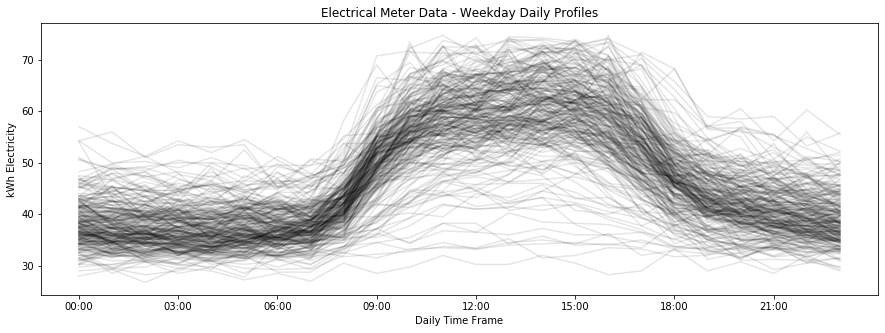

In [18]:
df_pivot_weekday.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekday Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

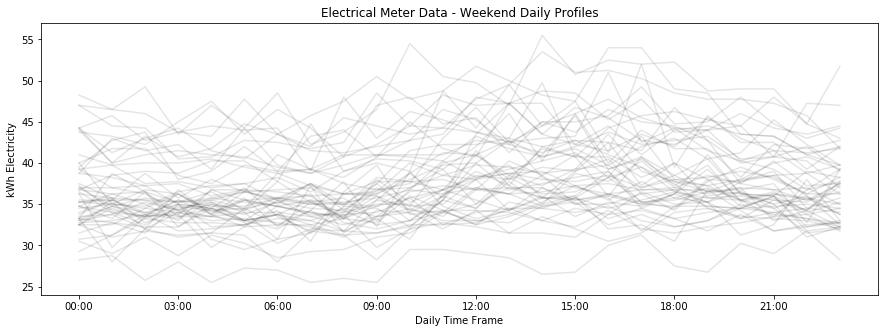

In [20]:
#  YOUR CODE HERE to do the same process, but this time for weekends (approx. 4-7 lines of code)
df_pivot_weekend = pd.pivot_table(df[(df.Weekday > 5)], values='Office_Mercedes', index='Date', columns='Time')
df_pivot_weekend.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekend Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

## Exercise 05.1.2 - Clustering

Now, lets get into some actual Unsupervised Machine Learning! :)

Use the code from the notebook showcased in the video to take the data loaded just now for `Office_Mercedes.csv` and cluster the daily load profiles to create **three clusters** of daily profiles

Follow the instructions in the comments of each cell to find code from the video lecture notebook and adapt for this exercise.

Hint: Much of the code is directly from the lecture video notebook with a few adaptations.

In [22]:
# YOUR CODE HERE to reload the data file and to create a normalized data frame called df_norm (approx. 2-3 lines of code)
df = pd.read_csv('Office_Mercedes.csv', index_col = "timestamp", parse_dates=True) 
df

,Office_Mercedes
timestamp,
2014-05-01 00:00:00,35.25
2014-05-01 01:00:00,32.00
2014-05-01 02:00:00,34.00
2014-05-01 03:00:00,32.00
2014-05-01 04:00:00,33.00
...,...
2015-04-30 19:00:00,37.00
2015-04-30 20:00:00,37.25
2015-04-30 21:00:00,39.75


In [23]:
# YOUR CODE HERE to add date and time columns to both the original dataframe and the df_norm (approx. 3-5 lines of code)
df_norm = (df - df.mean()) / (df.max() - df.min()) 

df['Time'] = df.index.map(lambda t: t.time())
df['Date'] = df.index.map(lambda t: t.date())
df_norm['Time'] = df_norm.index.map(lambda t: t.time())
df_norm['Date'] = df_norm.index.map(lambda t: t.date())

In [24]:
df

,Office_Mercedes,Time,Date
timestamp,,,
2014-05-01 00:00:00,35.25,00:00:00,2014-05-01
2014-05-01 01:00:00,32.00,01:00:00,2014-05-01
2014-05-01 02:00:00,34.00,02:00:00,2014-05-01
2014-05-01 03:00:00,32.00,03:00:00,2014-05-01
2014-05-01 04:00:00,33.00,04:00:00,2014-05-01
...,...,...,...
2015-04-30 19:00:00,37.00,19:00:00,2015-04-30
2015-04-30 20:00:00,37.25,20:00:00,2015-04-30
2015-04-30 21:00:00,39.75,21:00:00,2015-04-30


In [25]:
df_norm

,Office_Mercedes,Time,Date
timestamp,,,
2014-05-01 00:00:00,-0.172919,00:00:00,2014-05-01
2014-05-01 01:00:00,-0.238909,01:00:00,2014-05-01
2014-05-01 02:00:00,-0.198300,02:00:00,2014-05-01
2014-05-01 03:00:00,-0.238909,03:00:00,2014-05-01
2014-05-01 04:00:00,-0.218604,04:00:00,2014-05-01
...,...,...,...
2015-04-30 19:00:00,-0.137386,19:00:00,2015-04-30
2015-04-30 20:00:00,-0.132310,20:00:00,2015-04-30
2015-04-30 21:00:00,-0.081548,21:00:00,2015-04-30


In [26]:
# YOUR CODE HERE to create two pivoted DataFrame -- one for the normalized and unnormalized DataFrames (approx. 2-3 lines of code)
dailyblocks = pd.pivot_table(df, values='Office_Mercedes', index='Date', columns='Time', aggfunc='mean')
dailyblocks_norm = pd.pivot_table(df_norm, values='Office_Mercedes', index='Date', columns='Time', aggfunc='mean')

In [27]:
dailyblocks

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-01,35.25,32.00,34.00,32.00,33.00,34.50,34.00,34.50,36.75,44.75,...,57.25,55.00,52.00,48.25,44.00,41.25,38.25,37.75,36.50,36.75
2014-05-02,35.75,36.25,36.25,35.25,36.50,34.50,37.00,36.75,43.50,46.00,...,57.00,53.25,49.75,43.00,39.50,36.75,35.00,35.25,33.25,32.50
2014-05-03,32.75,35.50,36.00,34.75,36.50,35.00,34.00,37.75,36.50,36.50,...,35.00,34.50,35.00,32.75,33.25,35.50,35.75,37.75,34.25,35.00
2014-05-04,34.75,34.00,32.50,34.75,34.25,33.00,33.75,33.00,34.50,33.50,...,35.75,35.50,36.25,35.00,36.25,39.25,35.50,33.50,36.75,37.75
2014-05-05,34.25,35.50,34.50,34.00,34.00,35.25,36.50,36.50,43.75,50.00,...,60.25,59.25,52.75,51.50,46.00,44.50,44.25,43.00,42.00,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-26,30.75,31.25,33.75,31.75,32.00,32.50,34.25,30.50,36.50,39.75,...,35.00,36.00,32.00,32.50,30.50,36.75,34.25,31.75,32.25,32.75
2015-04-27,30.25,32.50,31.75,30.00,31.25,31.75,32.00,33.00,40.75,47.00,...,48.50,52.25,52.00,51.00,38.50,40.50,37.50,36.75,36.75,35.00
2015-04-28,30.25,33.50,32.50,34.50,33.75,32.00,33.25,34.00,37.75,47.25,...,56.75,57.00,50.50,46.75,41.00,41.50,43.00,33.50,33.50,35.50


In [28]:
dailyblocks_norm

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-01,-0.172919,-0.238909,-0.198300,-0.238909,-0.218604,-0.188147,-0.198300,-0.188147,-0.142462,0.019974,...,0.273781,0.228096,0.167182,0.091040,0.004746,-0.051092,-0.112005,-0.122158,-0.147538,-0.142462
2014-05-02,-0.162767,-0.152614,-0.152614,-0.172919,-0.147538,-0.188147,-0.137386,-0.142462,-0.005406,0.045355,...,0.268705,0.192563,0.121497,-0.015559,-0.086625,-0.142462,-0.177995,-0.172919,-0.213528,-0.228757
2014-05-03,-0.223680,-0.167843,-0.157691,-0.183071,-0.147538,-0.177995,-0.198300,-0.122158,-0.147538,-0.147538,...,-0.177995,-0.188147,-0.177995,-0.223680,-0.213528,-0.167843,-0.162767,-0.122158,-0.193224,-0.177995
2014-05-04,-0.183071,-0.198300,-0.228757,-0.183071,-0.193224,-0.218604,-0.203376,-0.218604,-0.188147,-0.208452,...,-0.162767,-0.167843,-0.152614,-0.177995,-0.152614,-0.091701,-0.167843,-0.208452,-0.142462,-0.122158
2014-05-05,-0.193224,-0.167843,-0.188147,-0.198300,-0.198300,-0.172919,-0.147538,-0.147538,-0.000330,0.126573,...,0.334695,0.314391,0.182411,0.157030,0.045355,0.014898,0.009822,-0.015559,-0.035863,-0.076472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-26,-0.264290,-0.254137,-0.203376,-0.243985,-0.238909,-0.228757,-0.193224,-0.269366,-0.147538,-0.081548,...,-0.177995,-0.157691,-0.238909,-0.228757,-0.269366,-0.142462,-0.193224,-0.243985,-0.233833,-0.223680
2015-04-27,-0.274442,-0.228757,-0.243985,-0.279518,-0.254137,-0.243985,-0.238909,-0.218604,-0.061244,0.065660,...,0.096117,0.172259,0.167182,0.146878,-0.106929,-0.066320,-0.127234,-0.142462,-0.142462,-0.177995
2015-04-28,-0.274442,-0.208452,-0.228757,-0.188147,-0.203376,-0.238909,-0.213528,-0.198300,-0.122158,0.070736,...,0.263629,0.268705,0.136726,0.060584,-0.056168,-0.046015,-0.015559,-0.208452,-0.208452,-0.167843


In [29]:
#dailyblocks_norm.to_csv("norm.csv",index=False)

In [0]:
# YOUR CODE HERE to create three clusters out of the normalized dataframe using k-means (approx. 3-4 lines of code)


In [0]:
# YOUR CODE HERE to assign the cluster number of each day into a new column called "ClusterNo" (approx. 2-3 lines of code)


In [0]:
# YOUR CODE HERE to plot the clusters as a line chart with overlapping lines and a different color for each cluster (approx. 14-18 lines of code)


## Exercise 05.1.3 - Creating a new line-based visualization - Advanced (Optional)
For each cluster, calculate the hourly **mean and standard deviation**, and plot the **mean** and the **standard deviation** in a duplicate visualization to the following graphic, except with three clusters instead of four.

<center><img src="https://user-images.githubusercontent.com/6969514/81120853-1890da00-8f60-11ea-9861-4817e4c4587f.png" width="60%" style="align:center"></center>

This exercise is fairly advanced and will require creating code that you won't find in the video notebooks. Its a good challenge for participants who really want to test their skills, but it won't be on the quiz.

**Hint 1:** You can `groupby` cluster number and then get the mean `.mean()` and the standard deviation `.std()`

**Hint 2:** Use matplotlib to [`fill_between`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html) the uper and the lower limits of the std

In [0]:
# YOUR CODE HERE to concat the pivoted DataFrame with the Clusters (approx. 1-2 lines of code)


In [0]:
# YOUR CODE HERE to use groupby and various aggregation functions (.mean(), std(), etc) to create new dataframes to plot (approx. 3-5 lines of code)


In [0]:
# YOUR CODE HERE to plot the generated aggregated dataframe and the shading between them (approx. 11-15 lines of code)
